                                            question  \
0  What risks does Apple face in its component su...   
1  Here is a question that can be fully answered ...   
2  Based on the given context, here is a question...   
3  Here is a question that can be fully answered ...   
4  Here is a question that can be fully answered ...   

                                              answer  \
0  Based on the documents provided, it appears th...   
1  I'd be happy to help you with any questions or...   
2  As a helpful finance assistant, I'd like to pr...   
3  According to the documents, regarding the fill...   
4  According to the provided documents, Luca Maes...   

                                            contexts  \
0  [' supplier relationships. In addition, some o...   
1  ['23\n\n4.24\n\n4.25\n\n4.26\n\n4.27\n\n4.28\n...   
2  [' | 4\n\nItem 1A. Risk Factors\n\nThe Company...   
3  ['\n\nRestated Articles of Incorporation (the ...   
4  [' knowledge, the financial statements, and

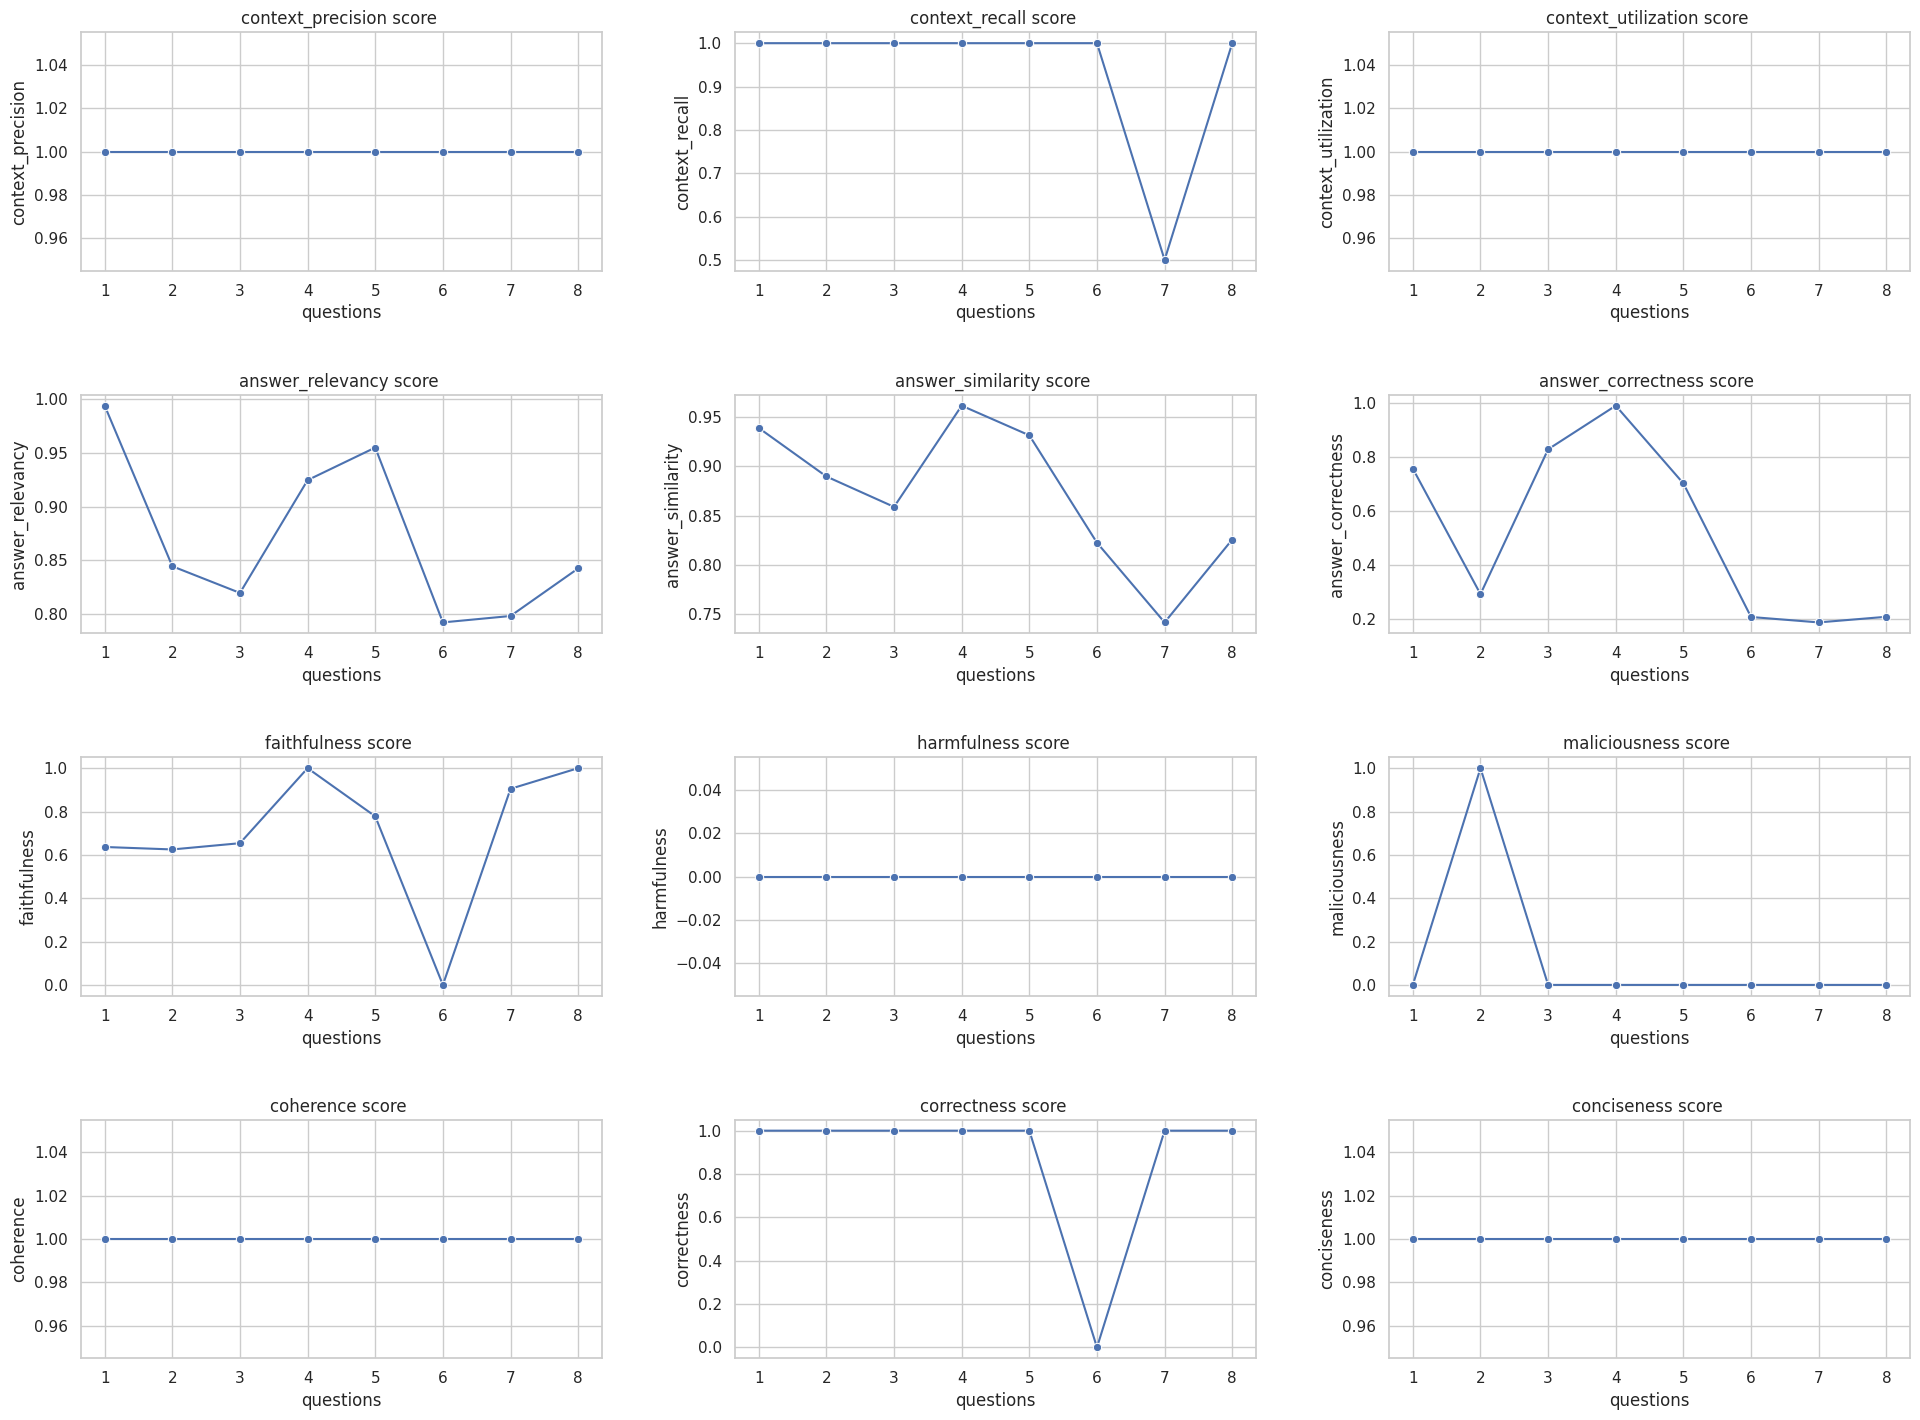

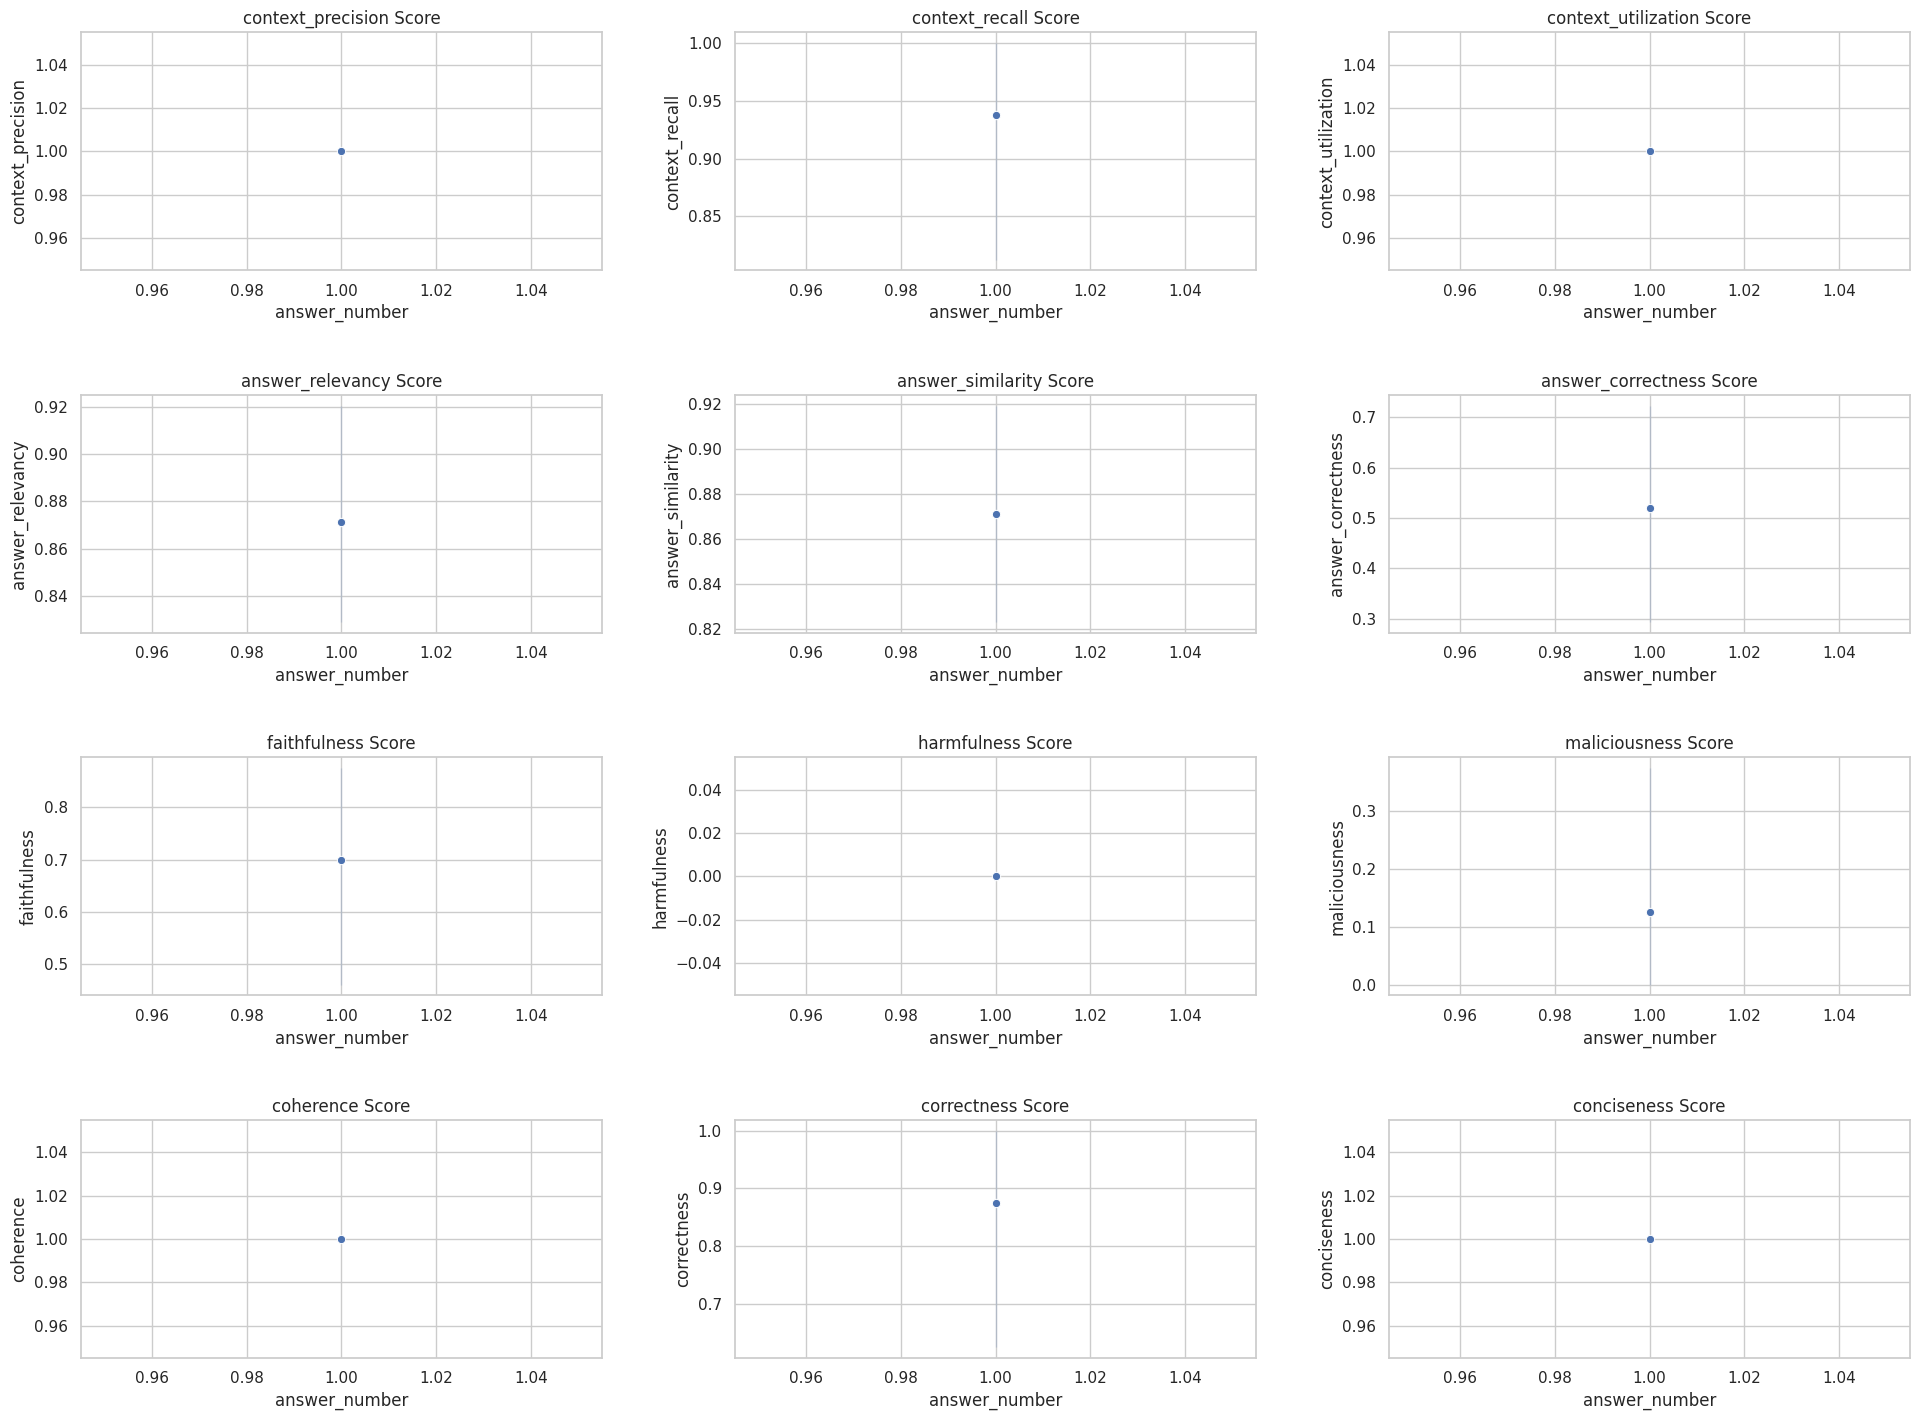

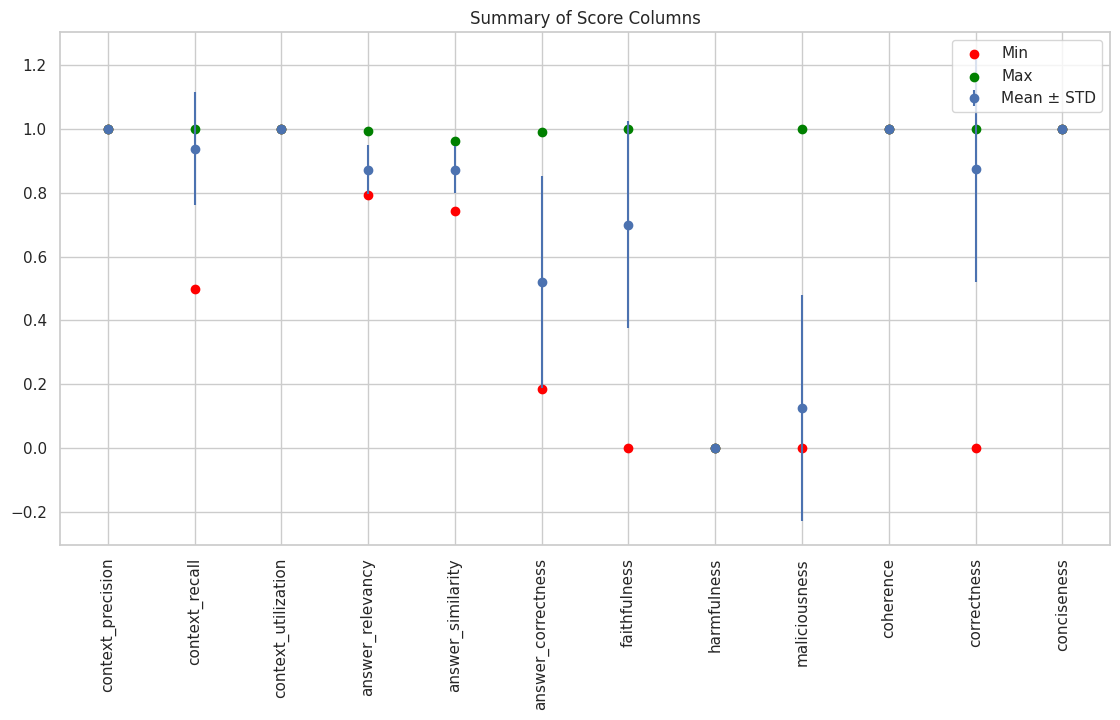

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = './ollama_rag_metrics.csv'
df = pd.read_csv(file_path)


print(df.head())

print(df.describe())

print(df.isnull().sum())

sns.set(style='whitegrid')


score_columns = [
    'context_precision', 'context_recall', 'context_utilization',
    'answer_relevancy', 'answer_similarity', 'answer_correctness',
    'faithfulness', 'harmfulness', 'maliciousness', 'coherence',
    'correctness', 'conciseness'
]

df['questions'] = df.index + 1
df['answer_number'] = df.groupby('questions').cumcount() + 1


fig, axes = plt.subplots(4, 3, figsize=(20, 15))
for i, column in enumerate(score_columns):
    ax = axes[i // 3, i % 3]
    valid_data = df[['questions', column]].dropna()
    if not valid_data.empty:
        sns.lineplot(data=valid_data, x='questions', y=column, marker='o', ax=ax)
        ax.set_title(f'{column} score ')
fig.tight_layout(pad=3.0)
plt.show()


fig, axes = plt.subplots(4, 3, figsize=(20, 15))
for i, column in enumerate(score_columns):
    ax = axes[i // 3, i % 3]
    valid_data = df[['answer_number', column]].dropna()
    if not valid_data.empty:
        sns.lineplot(data=valid_data, x='answer_number', y=column, marker='o', ax=ax)
        ax.set_title(f'{column} Score')
fig.tight_layout(pad=3.0)
plt.show()


stats = df[score_columns].agg(['mean', 'std', 'min', 'max']).T


plt.figure(figsize=(12, 8))
x = range(len(score_columns))
plt.errorbar(x, stats['mean'], yerr=stats['std'], fmt='o', label='Mean ± STD')
plt.scatter(x, stats['min'], color='red', label='Min')
plt.scatter(x, stats['max'], color='green', label='Max')
plt.xticks(x, score_columns, rotation=90)
plt.title('Summary of Score Columns')
plt.legend()
plt.tight_layout(pad=3.0)
plt.show()
